# Notebook to compare ML model results from JSON summary

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For better visuals
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 12})

In [3]:
RESULTS_PATH = "../models/comparison_summary.json"

with open(RESULTS_PATH, 'r', encoding='utf-8') as f:
    results = json.load(f)

In [4]:
# Extract data_info and models
data_info = results.get('data_info', {})
models = results.get('models', {})

print("Dataset info:", data_info)
print("Models found:", list(models.keys()))

Dataset info: {'train_samples': 431, 'test_samples': 105, 'class_distribution': {'Négatif': 94, 'Neutre': 39, 'Positif': 298}}
Models found: ['MultinomialNB', 'ComplementNB', 'LogisticRegression', 'RandomForest', 'LogisticRegressionAugmentedData', 'MultinomialNBAugmentedData', 'ComplementNBAugmentedData', 'RandomForestAugmentedData']


In [5]:
overall_metrics = []
for mname, mdict in models.items():
    overall_metrics.append({
        'model': mname,
        'accuracy': mdict.get('accuracy'),
        'weighted_f1': mdict.get('weighted_f1'),
        'macro_f1': mdict.get('macro_f1')
    })
df_overall = pd.DataFrame(overall_metrics).set_index('model')

print("\nOverall metrics per model:")
print(df_overall)

# Per‑class F1 scores
per_class = []
for mname, mdict in models.items():
    per = mdict.get('per_class_f1', {})
    per_class.append({
        'model': mname,
        'F1_Négatif': per.get('Négatif', None),
        'F1_Neutre': per.get('Neutre', None),
        'F1_Positif': per.get('Positif', None),
    })
df_per_class = pd.DataFrame(per_class).set_index('model')

print("\nPer-class F1 per model:")
print(df_per_class)


Overall metrics per model:
                                 accuracy  weighted_f1  macro_f1
model                                                           
MultinomialNB                    0.723810     0.640333  0.391746
ComplementNB                     0.733333     0.703041  0.479797
LogisticRegression               0.771429     0.712882  0.481219
RandomForest                     0.761905     0.704350  0.473304
LogisticRegressionAugmentedData  0.733333     0.717944  0.564457
MultinomialNBAugmentedData       0.704762     0.665307  0.464300
ComplementNBAugmentedData        0.676190     0.664185  0.491355
RandomForestAugmentedData        0.704762     0.636384  0.396457

Per-class F1 per model:
                                 F1_Négatif  F1_Neutre  F1_Positif
model                                                             
MultinomialNB                      0.344828   0.000000    0.830409
ComplementNB                       0.603774   0.000000    0.835616
LogisticRegression           

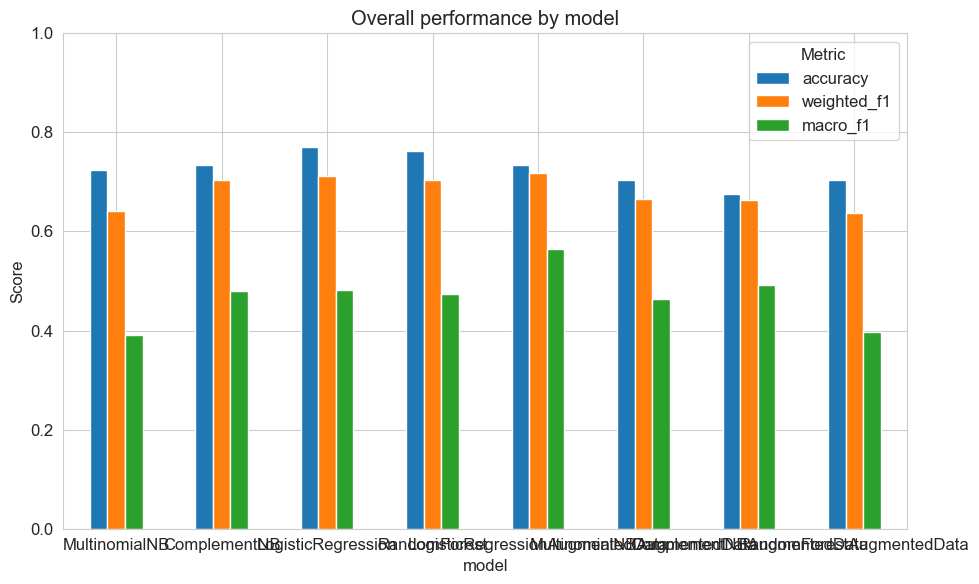

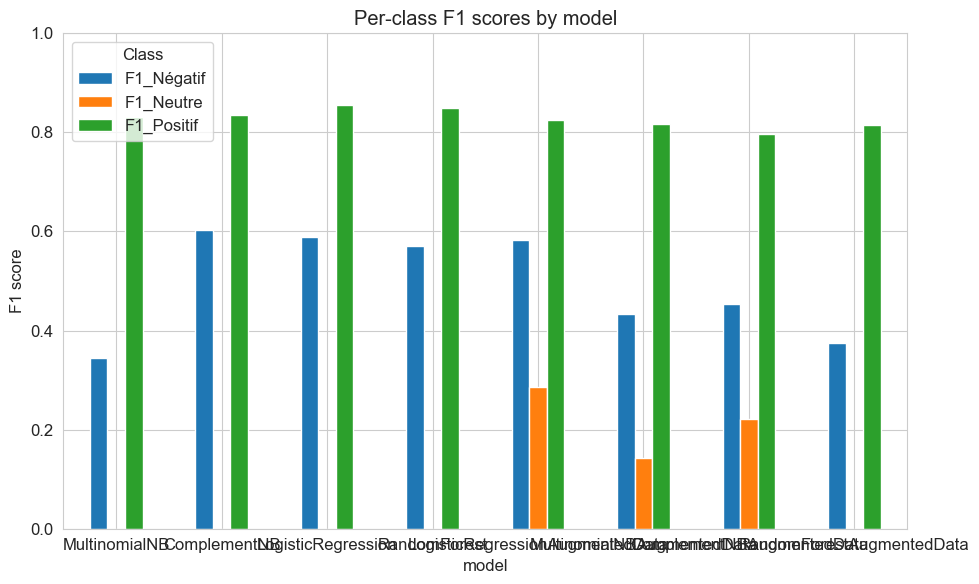

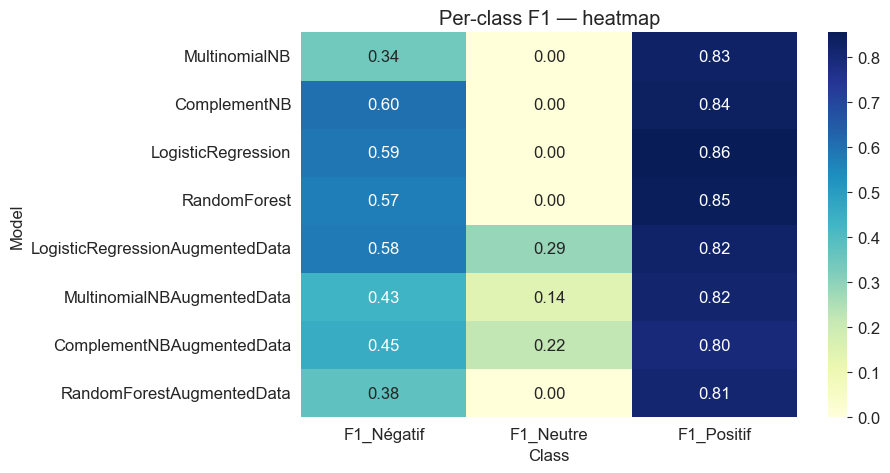


Combined summary (overall + per-class):


,accuracy,weighted_f1,macro_f1,F1_Négatif,F1_Neutre,F1_Positif
model,,,,,,
MultinomialNB,0.723810,0.640333,0.391746,0.344828,0.000000,0.830409
ComplementNB,0.733333,0.703041,0.479797,0.603774,0.000000,0.835616
LogisticRegression,0.771429,0.712882,0.481219,0.588235,0.000000,0.855422
RandomForest,0.761905,0.704350,0.473304,0.571429,0.000000,0.848485
LogisticRegressionAugmentedData,0.733333,0.717944,0.564457,0.583333,0.285714,0.824324
MultinomialNBAugmentedData,0.704762,0.665307,0.464300,0.432432,0.142857,0.817610
ComplementNBAugmentedData,0.676190,0.664185,0.491355,0.454545,0.222222,0.797297
RandomForestAugmentedData,0.704762,0.636384,0.396457,0.375000,0.000000,0.814371


In [6]:
# 1. Bar chart – Overall metrics
df_overall.plot(kind='bar', rot=0)
plt.title("Overall performance by model")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# 2. Bar chart – Per-class F1 scores
df_per_class.plot(kind='bar', rot=0)
plt.title("Per-class F1 scores by model")
plt.ylabel("F1 score")
plt.ylim(0, 1.0)
plt.legend(title="Class")
plt.tight_layout()
plt.show()

# 3. Heatmap of per-class F1 — easier to read differences
plt.figure(figsize=(8, 5))
sns.heatmap(df_per_class, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Per-class F1 — heatmap")
plt.xlabel("Class")
plt.ylabel("Model")
plt.show()

# 4. Combined ranking / comparison table
df_combined = pd.concat([df_overall, df_per_class], axis=1)
print("\nCombined summary (overall + per-class):")
display(df_combined)

